# Correlation
- Correlation measures association, but doesn't show if x causes y or vice versa
- Correlation is a statistic that measures the degree to which two variables move in relation to each other.
- In finance, the correlation can measure the movement of a stock with that of a benchmark index, such as the S&P 500.


### Formula
- $r = \frac{\sum(X - \bar{X})(Y - \bar{Y})}{\sqrt{\sum(X - \bar{X})^2 \sum(Y - \bar{Y})^2}}$
- $r$: the correlation factor
- $\bar{X}$: the average observations of $X$
- $\bar{Y}$: the average observations of $Y$

What does it mean?
- $r$ ranges between -1 and 1 (both inclusive)
- $r = 1$: Perfect positive correlation
- $r = -1$: Perfect negative correlation
- $r = 0$: No correlation at all

### Resources
- Correlation https://www.investopedia.com/terms/c/correlation.asp
- SP500 by Market Cap https://www.slickcharts.com/sp500

In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import numpy as np

In [2]:
tickers = ['AAPL', 'TWTR', 'IBM', 'MSFT']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [3]:
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL       TWTR         IBM        MSFT       AAPL   
Date                                                                  
2020-01-02  74.333511  32.299999  126.975204  158.571075  75.087502   
2020-01-03  73.610840  31.520000  125.962540  156.596588  74.357498   
2020-01-06  74.197395  31.639999  125.737526  157.001373  74.949997   
2020-01-07  73.848442  32.540001  125.821907  155.569855  74.597504   
2020-01-08  75.036385  33.049999  126.872055  158.047836  75.797501   

Attributes                                          High             ...  \
Symbols          TWTR         IBM        MSFT       AAPL       TWTR  ...   
Date                                                                 ...   
2020-01-02  32.299999  135.419998  160.619995  75.150002  32.500000  ...   
2020-01-03  31.520000  134.339996  158.619995  75.144997  32.099998  ...   
2020-01-06  31.639999  134.100006  159.029999  74.989998  31.709999  ...   
2020-01-07  32.540001  134.190002  157.580002  75.224998  32.700001  ...   
2020-01-08  33.049999  135.309998  160.089996  76.110001  33.400002  ...   

Attributes         Low                   Open                         \
Symbols            IBM        MSFT       AAPL       TWTR         IBM   
Date                                                                   
2020-01-02  134.770004  158.330002  74.059998  32.310001  135.000000   
2020-01-03  133.559998  158.059998  74.287498  31.709999  133.570007   
2020-01-06  133.199997  156.509995  73.447502  31.230000  133.419998   
2020-01-07  133.399994  157.320007  74.959999  31.799999  133.690002   
2020-01-08  133.919998  157.949997  74.290001  32.349998  134.509995   

Attributes                   Volume                                     
Symbols           MSFT         AAPL        TWTR        IBM        MSFT  
Date                                                                    
2020-01-02  158.779999  135480400.0  10721100.0  3148600.0  22622100.0  
2020-01-03  158.320007  146322800.0  14429500.0  2373700.0  21116200.0  
2020-01-06  157.080002  118387200.0  12582500.0  2425500.0  20813700.0  
2020-01-07  159.320007  108872000.0  13712900.0  3090800.0  21634100.0  
2020-01-08  158.929993  132079200.0  14632400.0  4346000.0  27746500.0  

[5 rows x 24 columns]

In [4]:
data = data['Adj Close']

In [5]:
data.head()

Symbols,AAPL,TWTR,IBM,MSFT
Date,,,,
2020-01-02,74.333511,32.299999,126.975204,158.571075
2020-01-03,73.610840,31.520000,125.962540,156.596588
2020-01-06,74.197395,31.639999,125.737526,157.001373
2020-01-07,73.848442,32.540001,125.821907,155.569855
2020-01-08,75.036385,33.049999,126.872055,158.047836


In [6]:
log_returns = np.log(data/data.shift())

In [7]:
log_returns

Symbols,AAPL,TWTR,IBM,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.024445,-0.008007,-0.012530
2020-01-06,0.007937,0.003800,-0.001788,0.002582
2020-01-07,-0.004714,0.028048,0.000671,-0.009160
2020-01-08,0.015958,0.015551,0.008312,0.015803
...,...,...,...,...
2021-02-18,-0.008674,0.006526,0.006315,-0.001680
2021-02-19,0.001233,0.000277,-0.014517,-0.011635
2021-02-22,-0.030252,-0.025077,0.015593,-0.027174


In [8]:
log_returns.corr()

Symbols,AAPL,TWTR,IBM,MSFT
Symbols,,,,
AAPL,1.000000,0.529815,0.535012,0.830747
TWTR,0.529815,1.000000,0.410229,0.566151
IBM,0.535012,0.410229,1.000000,0.598887
MSFT,0.830747,0.566151,0.598887,1.000000


In [9]:
sp500 = pdr.get_data_yahoo("^GSPC", start)

In [11]:
log_returns['SP500'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift())

In [13]:
log_returns.corr()

Symbols,AAPL,TWTR,IBM,MSFT,SP500
Symbols,,,,,
AAPL,1.000000,0.529815,0.535012,0.830747,0.816672
TWTR,0.529815,1.000000,0.410229,0.566151,0.618278
IBM,0.535012,0.410229,1.000000,0.598887,0.793861
MSFT,0.830747,0.566151,0.598887,1.000000,0.871122
SP500,0.816672,0.618278,0.793861,0.871122,1.000000


In [15]:
def test_correlation(ticker):
    df = pdr.get_data_yahoo(ticker, start)
    lr = log_returns.copy()
    lr[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
    return lr.corr()

In [16]:
test_correlation("LQD")

Symbols,AAPL,TWTR,IBM,MSFT,SP500,LQD
Symbols,,,,,,
AAPL,1.000000,0.529815,0.535012,0.830747,0.816672,0.257823
TWTR,0.529815,1.000000,0.410229,0.566151,0.618278,0.271740
IBM,0.535012,0.410229,1.000000,0.598887,0.793861,0.276091
MSFT,0.830747,0.566151,0.598887,1.000000,0.871122,0.264325
SP500,0.816672,0.618278,0.793861,0.871122,1.000000,0.326945
LQD,0.257823,0.271740,0.276091,0.264325,0.326945,1.000000


In [17]:
test_correlation("TLT")

Symbols,AAPL,TWTR,IBM,MSFT,SP500,TLT
Symbols,,,,,,
AAPL,1.000000,0.529815,0.535012,0.830747,0.816672,-0.357068
TWTR,0.529815,1.000000,0.410229,0.566151,0.618278,-0.168687
IBM,0.535012,0.410229,1.000000,0.598887,0.793861,-0.441611
MSFT,0.830747,0.566151,0.598887,1.000000,0.871122,-0.367754
SP500,0.816672,0.618278,0.793861,0.871122,1.000000,-0.468185
TLT,-0.357068,-0.168687,-0.441611,-0.367754,-0.468185,1.000000


In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [20]:
def visualize_correlation(ticker1, ticker2):
    df = pdr.get_data_yahoo([ticker1, ticker2], start)
    df = df['Adj Close']
    df = df/df.iloc[0]
    fig, ax = plt.subplots()
    df.plot(ax=ax)

<IPython.core.display.Javascript object>


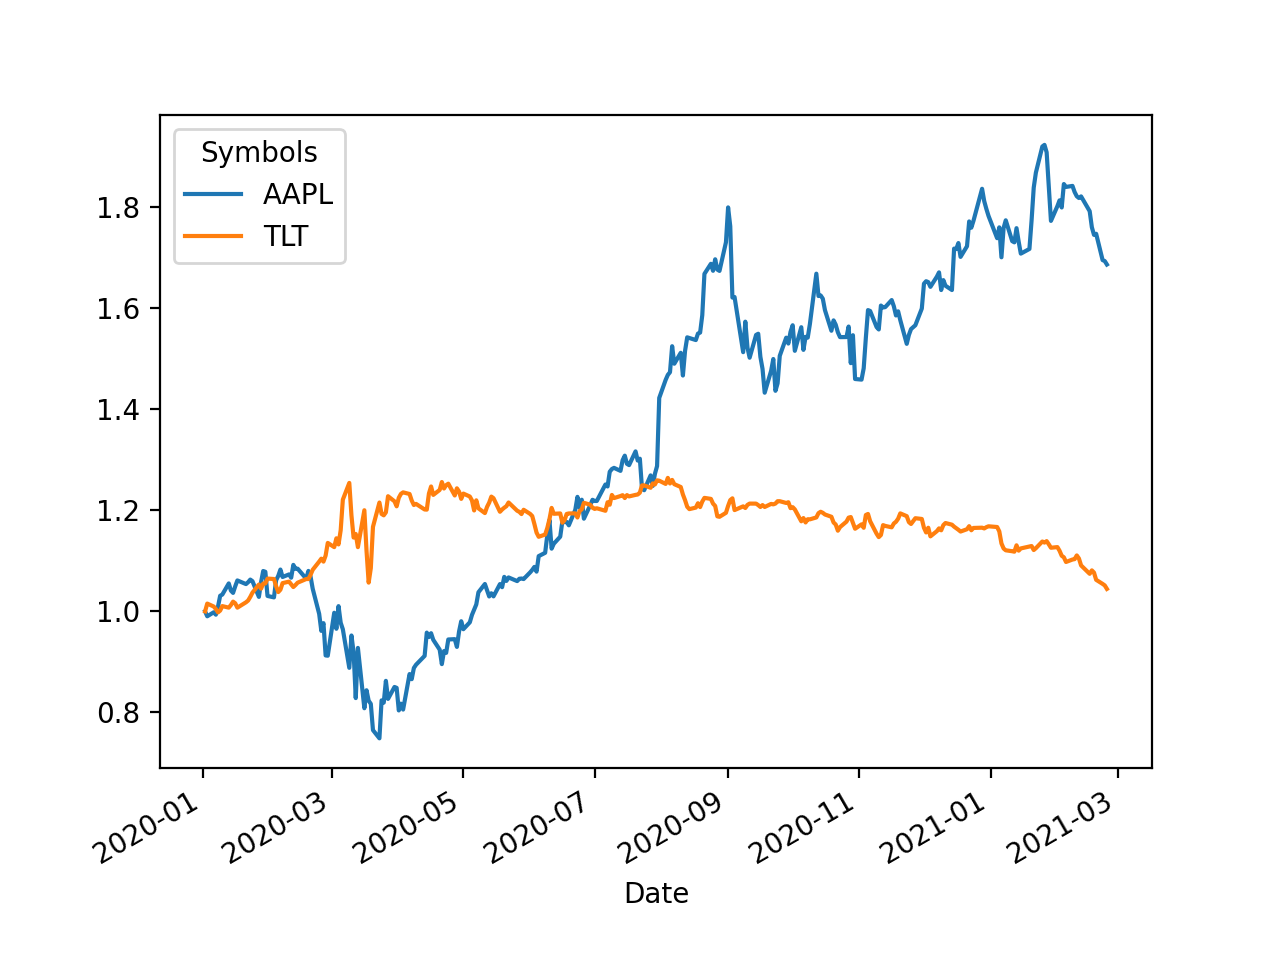

In [21]:
visualize_correlation("AAPL", "TLT")

<IPython.core.display.Javascript object>


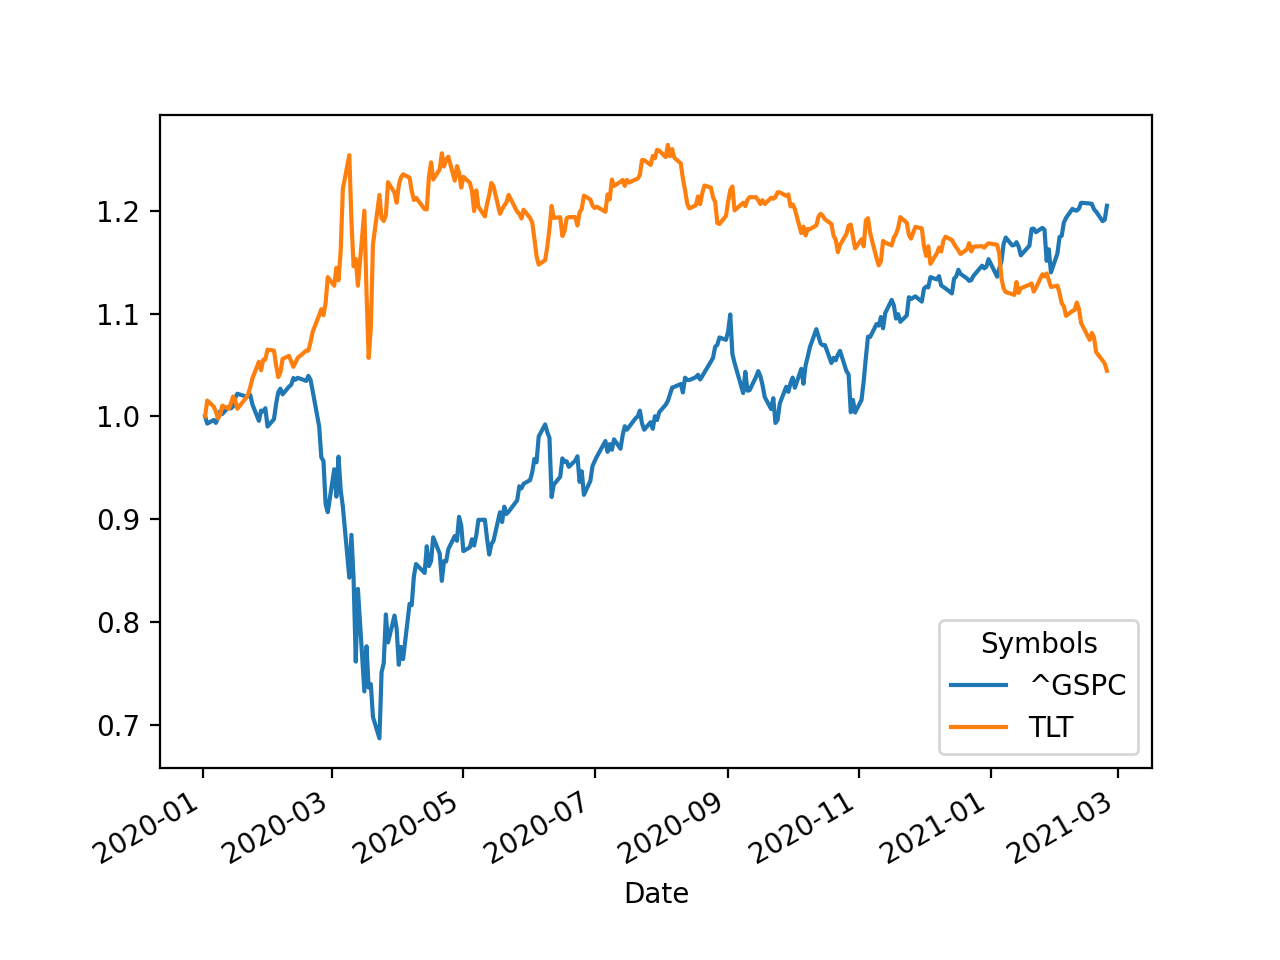

In [22]:
visualize_correlation("^GSPC", "TLT")